# Project: WeRateDogs - Data Wrangling and Analysis 

## Introduction ##

This is a final project for the “Data Wrangling” section of “Data Analyst” Nanodegree course by Udacity. The subject of analysis for this project is WeRateDogs, a popular Twitter account that rates pet dogs with a humorous comment about the dog. Data on WeRateDogs are collected from different sources and then cleaned before a final analysis on its contents and features.

Completion of this project requires skills below:

-	Gathering data from multiple sources, including programmatically downloading files and accessing data from APIs
-	Importing data of various file formats into Pandas
-	Assessing data visually and programmatically using Pandas
-	Identifying data quality issues, such as validity, accuracy, completeness, consistency, and uniformity, and categorize them using metrics
-	Cleaning data using Pyhon and Pandas

#### About the Data ####

The data come from three sources:

-	An archive dataset file of more than 5,000 tweets, which provides information on individual tweet id, text content of the tweet, reply status, re-tweet status, ratings, name and breed of the dog. The information of ratings, dog name and dog stage was extracted programmatically from the text content of the tweet and needs further cleaning
-	Data on the breed of the dog in the tweet based on image prediction. The data is stored on Udacity’s server and needs to be downloaded programmatically
-	Data via the Twitter API on tweet id, retweet count, and favorite count


## Gather Data ##

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

### 1. Twitter Archive File ###

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

- Load the Twitter archive file, which was downloaded manually from the source provided by Udacity and uploaded to the Jupyter Notebook Workspace, into a DataFrame

In [3]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bentley. He got stuck on his 3rd homework problem. Picturing the best case scenario if he drops out. 10/10 https://t.co/7rS33sCKMS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446429966336/photo/1,10,10,Bentley,None,None,None,None
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026190569472/photo/1,11,10,a,None,None,None,None
1203,716285507865542656,NaN,NaN,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/716285507865542656/photo/1,https://twitter.com/dog_rates/status/716285507865542656/photo/1",12,10,Stephanus,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936087216128/photo/1,10,10,Rorie,None,None,None,None
777,776088319444877312,NaN,NaN,2016-09-14 16:00:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can't tap the screen to make the hearts appear fast enough. 10/10 for the source of all future unproductiveness https://t.co/wOhuABgj6I,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/776088319444877312/photo/1,https://twitter.com/dog_rates/status/776088319444877312/photo/1,https://twitter.com/dog_rates/status/776088319444877312/photo/1,https://twitter.com/dog_rates/status/776088319444877312/photo/1",10,10,None,None,None,None,None


In [4]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- Have a quick look at the dataset, especially the columns and format and data type of the entries

### 2. Image Predictions File ###

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response

<Response [200]>

- Download the image predictions file from the URL provided
- HTTP status code [200] means the request succeeded

In [6]:
file_predictions = url.split('/')[-1] 
 
with open(os.path.join('./', file_predictions), mode = 'wb') as file:     
    file.write(response.content)

In [7]:
df_predictions = pd.read_csv(file_predictions, sep = '\\t', engine = 'python')

- Load it into a DataFrame

In [8]:
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
143,668620235289837568,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False


In [9]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Have a quick look at the dataset, especially the columns and format and data type of the entries

### 3. Additional Data through Twitter API ###

In [ ]:
consumer_key = '*************************'
consumer_secret = '**************************************************'
access_token = '***************************************************'
access_secret = '***********************************************'

- Authentication keys acquired through setting up Twitter developer account

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

tweet_id_list = df_twitter.tweet_id.values
print('# of tweet ids:' + str(len(tweet_id_list)) + '\n')

tweet_json_list = []
deleted_tweets = {}

start_time = time.time()

for tweet_id in tweet_id_list:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_json_list.append(tweet._json)    
    except tweepy.TweepError as err:
        deleted_tweets[tweet_id] = err
        print('TweepError for id: ' + str(tweet_id))

time_elapsed = time.time() - start_time

time_elapsed_str = time.strftime("%H:%M:%S", time.gmtime(time_elapsed)) 
print("\nTime elapsed (HH:MM:SS):  " + time_elapsed_str + "\n") 

print("Number of TweepErrors: {}\n".format(len(deleted_tweets))) 

for tweet_id in deleted_tweets:
    print(tweet_id, deleted_tweets[tweet_id])

- Create the Twitter API object and set rate limit parameters
- Create a list of Tweet IDs from the Twitter archive file for downloading additional data from Twitter API
- 23 TweepErrors reported

In [ ]:
tweet_json_file = 'tweet_json.txt'

with open(tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [ ]:
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    line = json_file.readline()
    while line:
        data = json.loads(line)
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']

        json_data = {'tweet_id': data_id,
                     'retweet_count': data_retweet_count,                       
                     'favorite_count': data_favorite_count}
        tweet_json_data.append(json_data)

df_tweet_api = pd.DataFrame(tweet_json_data, columns = ['tweet_id', 
                                                  'retweet_count', 
                                                  'favorite_count']) 

df_tweet_api.to_csv('tweet_api.csv', index = False)

- Save the JSON data as a file
- Extract the "tweet_id", "retweet_count", "favorite_count" data and convert them into a DataFrame  
- Save the DataFrame as a separate file


In [10]:
df_extra_api = pd.read_csv('tweet_api.csv')

In [11]:
df_extra_api.sample(5)

,tweet_id,retweet_count,favorite_count
303,834786237630337024,5672,21884
1982,672272411274932228,3347,6419
1328,704113298707505153,578,1895
1495,690938899477221376,2039,4222
968,748705597323898880,980,2852


In [12]:
df_extra_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


- Have a quick look at the dataset, especially the columns and format and data type of the entries

## Assess Data ##

In [13]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
df_extra_api = pd.read_csv('tweet_api.csv')

### 1. Twitter Archive File ###

In [14]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- 181 retweets and 78 replies in the dataset
- Only 2297 Tweets in the dataset with images (expanded_urls)
- Entries in "timestamp" column are of string format
- Entries in some ID columns are of float format
- "doggo", "floofer", "pupper", "puppo", which are stages of dog, are in four columns

In [15]:
sum(df_archive.duplicated())

0

- No duplicated entries found in the dataset

In [16]:
df_archive.name.value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
Cooper     11 
Tucker     10 
Penny      10 
Lola       10 
Winston    9  
Bo         9  
the        8  
Sadie      8  
Daisy      7  
Bailey     7  
Buddy      7  
Toby       7  
an         7  
Koda       6  
Bella      6  
Dave       6  
Stanley    6  
Scout      6  
Jax        6  
Jack       6  
Leo        6  
Oscar      6  
Milo       6  
Rusty      6  
Sunny      5  
          ..  
Timofy     1  
Clybe      1  
Tedrick    1  
Zeek       1  
Antony     1  
Mutt       1  
Howie      1  
Tommy      1  
Shelby     1  
Rumpole    1  
Aubie      1  
Ester      1  
Harry      1  
Jangle     1  
Mona       1  
Blipson    1  
Tove       1  
Mabel      1  
Karma      1  
Iggy       1  
Crouton    1  
Mack       1  
Molly      1  
Traviss    1  
Julius     1  
Buckley    1  
Darla      1  
Shikha     1  
Henry      1  
Ruffles    1  
Name: name, Length: 957, dtype: int64

- Invalid entries ("a", "the", "an") and "None" as entry in "name" column

In [17]:
df_archive.timestamp.max()

'2017-08-01 16:23:56 +0000'

- All Tweets in the dataset were posted on or before August 1st, 2017 as suggested in the project overview

In [18]:
sum(df_archive.expanded_urls.isnull())

59

In [19]:
sum(df_archive.expanded_urls.isnull() & 
    (df_archive.in_reply_to_status_id.notnull() | 
     df_archive.retweeted_status_id.notnull()))

56

In [20]:
filter = df_archive.expanded_urls.isnull() & df_archive.in_reply_to_status_id.isnull() & df_archive.retweeted_status_id.isnull()
    
df_archive[filter]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [21]:
tweet_ids_check = [828361771580813312, 785515384317313025, 696518437233913856]

sum(df_predictions.tweet_id.isin(tweet_ids_check))

0

In [22]:
df_extra_api[df_extra_api.tweet_id.isin(tweet_ids_check)]

,tweet_id,retweet_count,favorite_count
360,828361771580813312,177,2282
689,785515384317313025,1334,6390
1423,696518437233913856,1748,4005


- 59 Tweet entries in the dataset are without an URL ("expanded_urls"), of which 56 are either retweet or reply
- The remaining 3 Tweet entries, which don't have an URL and are neither a retweet nor a reply:
    - all have valid ratings
    - **not** found in the image predictions dataset
    - found in the extra dataset retreived through Twitter API, with valid retweet and favorite counts

In [23]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- Not all rating denominator is 10

In [24]:
df_archive.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [25]:
filter_deviant_denominator = (df_archive.rating_denominator != 10) & df_archive.retweeted_status_id.isna() & df_archive.in_reply_to_status_id.isna()

df_deviant_denominator = df_archive[filter_deviant_denominator][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

In [26]:
df_deviant_denominator.shape[0]

17

In [27]:
df_deviant_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [28]:
list_deviant_denominator = [810984652412424192, 
                            740373189193256964, 
                            722974582966214656, 
                            716439118184652801, 
                            682962037429899265, 
                            666287406224695296]
len(list_deviant_denominator)

6

- One of the key points in the introduction of the project states that "[t]he fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs."
- However, when retweets and replies are excluded, there are in total 17 Tweet entries with a rating denominator other than 10
- The ratings are extracted from the text programmatically. Unfortunately, some of them are inaccurate. For example, a rating of 7/11 was assigned to this Tweet: "This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10"
- Rating denominators that are multiples of 10 are for entries with mutiple dogs in a Tweet
- Tweet IDs of 6 entries in question are collected in a list

In [29]:
df_archive.query('rating_denominator == 10').rating_numerator.value_counts().sort_index(ascending=False)

1776    1  
666     1  
420     2  
182     1  
75      2  
27      1  
26      1  
17      1  
15      2  
14      54 
13      351
12      558
11      463
10      461
9       156
8       102
7       54 
6       32 
5       37 
4       15 
3       19 
2       9  
1       8  
0       2  
Name: rating_numerator, dtype: int64

- Of the entries with 10 as denominator, ten have rating numerators higher than 15

In [30]:
df_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [31]:
df_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [32]:
df_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [33]:
df_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

- Not every Tweet entry is assigned a stage of dog

### 2. Image Predictions File ###

In [34]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
607,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False


In [36]:
df_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
Cardigan                     19 
web_site                     19 
Eskimo_dog                   18 
Shetland_sheepdog            18 
beagle                       18 
Maltese_dog                  18 
teddy                        18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
Italian_greyhound            16 
kuvasz                       16 
          

In [37]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
df_not_dog = df_predictions[~df_predictions.p1_dog & ~df_predictions.p2_dog & ~df_predictions.p3_dog]
df_not_dog.shape[0]

324

In [39]:
df_not_dog.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/753420390836346880/pu/img/ZHLvYxSHYuQK3uXi.jpg,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
666,682788441537560576,https://pbs.twimg.com/media/CXnAdosWAAEMGCM.jpg,1,toyshop,0.375610,False,orange,0.094538,False,teddy,0.039808,False
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False


- Images in 324 Tweet entries are not categorized as dog in any of the three predictions by the algorithm

### 3. Additional Data through Twitter API ###

In [40]:
df_extra_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [41]:
df_extra_api.sample(5)

,tweet_id,retweet_count,favorite_count
854,761227390836215808,1625,5506
784,772117678702071809,774,3925
1155,719704490224398336,1478,4655
269,839290600511926273,146,0
695,784183165795655680,8504,21076


In [42]:
df_extra_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2805.621517,7768.775825
std,6.820607e+16,4749.564898,12061.976413
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,562.000000,1347.000000
50%,7.184547e+17,1314.000000,3383.000000
75%,7.986654e+17,3268.000000,9532.000000
max,8.924206e+17,80630.000000,161051.000000


- No issues found in the data through API

### Quality ###

**Twitter Archive File**

- 181 retweets in the dataset
- 78 replies in the dataset
- 59 Tweet entries without images (without "expanded_urls")

(It is indicated in the "Project Motivation" section that "[y]ou only want original ratings (no retweets) that have images." Retweets, replies and entries without images should be removed)


- "timestamp" and "retweeted_status_timestamp" entries are strings, not of timestamp data type
- Entries in ID columns ("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id") are of float format
- Invalid entries ("a", "the", "an") and "None" as entry in "name" column
- When retweets and replies are excluded, there are in total 17 Tweet entries with a rating denominator other than "10", of which 6 entries are extraction errors
- Of the entries with 10 as denominator, ten have rating numerators higher than 15

**Image Predictions File**

- In total 2075 Tweet entries, 281 entries missing (in comparison to the archive data)
- Images in 324 Tweet entries are not categorized as dog in any of the three predictions by the algorithm

**Additional Data through Twitter API**

- In total 2333 Tweet entries - 23 Tweets deleted/missing from the list in the archive file (TweepErrors)

### Tidiness ###

- Data from Twitter archive, image predictions data and the extra data through Twitter API should be in one table
- Stage of dog (doggo,floofer, pupper, puppo) should be in one column

## Clean Data ##

In [43]:
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_extra_api_clean = df_extra_api.copy()

### 1. Twitter Archive File ###

### Quality ###

Twitter archive: **Retweets are not considered for data analysis**

**Define**

Remove the retweet rows in the dataset, of which the entries in "retweeted_status_id" column is not null

**Code**

In [44]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

**Test**

In [45]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

Twitter archive: **Replies are not considered for data analysis**

**Define**

Remove the reply rows in the dataset, of which the entries in "in_reply_to_status_id" column is not null

**Code**

In [46]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull()]

**Test**

In [47]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

Twitter archive: **3 columns related to retweets no longer relevant in the dataset**

**Define**

Remove the columns "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

**Code**

In [48]:
df_archive_clean = df_archive_clean.drop(['retweeted_status_id', 
                                          'retweeted_status_user_id', 
                                          'retweeted_status_timestamp'], axis=1)

**Test**

In [49]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


Twitter archive: **2 columns related to replies no longer relevant in the dataset**

**Define**

Remove the columns "in_reply_to_status_id", "in_reply_to_user_id"

**Code**

In [50]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 
                                          'in_reply_to_user_id'], axis=1)

**Test**

In [51]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


Twitter archive: **Entries in ID columns ("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id") are of float format**

**Define**

These columns have already been removed in the previous steps

Twitter archive: **"timestamp" column of string format**

**Define**

Convert "timestamp" to datetime data type

**Code**

In [52]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

**Test**

In [53]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


Twitter archive: **6 Tweets with wrong denominator due to extraction error**

**Define**

Manually fix the ratings of Tweets in the ID list below:

1. 810984652412424192: not a rating, should be removed
2. 740373189193256964: chage to 14/10
3. 722974582966214656: change to 13/10
4. 716439118184652801: change 11/10
5. 682962037429899265: change 10/10
6. 666287406224695296: change 9/10

**Code**

In [54]:
row_1 = df_archive_clean.tweet_id == 810984652412424192
df_archive_clean[row_1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [55]:
df_archive_clean = df_archive_clean.drop(516)

In [56]:
row_2 = df_archive_clean.tweet_id == 740373189193256964
df_archive_clean.loc[row_2, 'rating_denominator'] = 10
df_archive_clean.loc[row_2, 'rating_numerator'] = 14

In [57]:
row_3 = df_archive_clean.tweet_id == 722974582966214656
df_archive_clean.loc[row_3, 'rating_denominator'] = 10
df_archive_clean.loc[row_3, 'rating_numerator'] = 13

In [58]:
row_4 = df_archive_clean.tweet_id == 716439118184652801
df_archive_clean.loc[row_4, 'rating_denominator'] = 10
df_archive_clean.loc[row_4, 'rating_numerator'] = 11

In [59]:
row_5 = df_archive_clean.tweet_id == 682962037429899265
df_archive_clean.loc[row_5, 'rating_denominator'] = 10
df_archive_clean.loc[row_5, 'rating_numerator'] = 10

In [60]:
row_6 = df_archive_clean.tweet_id == 666287406224695296
df_archive_clean.loc[row_6, 'rating_denominator'] = 10
df_archive_clean.loc[row_6, 'rating_numerator'] = 9

**Test**

In [61]:
list_deviant_denominator = [810984652412424192, 
                            740373189193256964, 
                            722974582966214656, 
                            716439118184652801, 
                            682962037429899265, 
                            666287406224695296]

df_archive_clean[df_archive_clean['tweet_id'].isin(list_deviant_denominator)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


Twitter archive: **Tweets with rating denominators that are multiples of 10 are entries with mutiple dogs**

**Define**

Drop the Tweets with rating denominators other than 10

**Code**

In [62]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_denominator == 10]

**Test**

In [63]:
df_archive_clean.rating_denominator.value_counts()

10    2085
Name: rating_denominator, dtype: int64

Twitter archive: **Some Tweets with deviant numerators**

**Define**

Drop Tweets with rating numerator larger than 14

In [64]:
df_archive_clean.rating_numerator.value_counts().sort_index(ascending=False)

1776    1  
420     1  
75      1  
27      1  
26      1  
14      39 
13      288
12      486
11      414
10      437
9       153
8       98 
7       51 
6       32 
5       34 
4       15 
3       19 
2       9  
1       4  
0       1  
Name: rating_numerator, dtype: int64

**Code**

In [65]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_numerator < 15]

**Test**

In [66]:
df_archive_clean.rating_numerator.value_counts().sort_index(ascending=False)

14    39 
13    288
12    486
11    414
10    437
9     153
8     98 
7     51 
6     32 
5     34 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

Twitter archive: **Three Tweet entries are without images ("expanded_urls") and can't be found in image predictions file**

**Define**

Drop Tweets without "expanded_urls"

**Code**

In [67]:
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notnull()]

**Test**

In [68]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.9+ KB


Twitter archive: **Invalid entries ("a", "the", "an") and "None" as entry in "name" column**

**Define**

Replace invalid entries with "None"

In [69]:
invalid_names = df_archive_clean.name.str.contains('^[a-z]', regex=True)
df_archive_clean.loc[invalid_names, 'name'] = "None"

**Test**

In [70]:
df_archive_clean.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Zeus      

### Tidiness ###

Twitter archive: **Stage of dog in four columns**

**Define**

- Replace the entries in the four stage of dog columns with 1 and 0 where 0 indicates "None"
- Melt the four columns to a "dog_stage" column

**Code**

In [71]:
replacement = lambda x: 0 if x == "None" else 1

df_archive_clean.doggo = df_archive_clean.doggo.apply(replacement)
df_archive_clean.floofer = df_archive_clean.floofer.apply(replacement)
df_archive_clean.pupper = df_archive_clean.pupper.apply(replacement)
df_archive_clean.puppo = df_archive_clean.puppo.apply(replacement)

In [72]:
df_archive_clean['none'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']
df_archive_clean['none'].value_counts()

0    1743
1    323 
2    11  
Name: none, dtype: int64

11 Tweet entries found to be with 2 stages of dog. The stage (of the two) with lower count is kept

In [73]:
df_archive_clean.sample(10)[['doggo', 'floofer', 'pupper', 'puppo', 'none']]

,doggo,floofer,pupper,puppo,none
1815,0,0,0,0,0
320,0,0,0,0,0
981,0,0,1,0,1
579,0,0,0,0,0
388,0,0,0,0,0
531,1,0,1,0,2
2086,0,0,0,0,0
144,0,0,0,0,0
1197,0,0,1,0,1
1864,0,0,0,0,0


In [74]:
stage = lambda x: 1 if x == 0 else 0

df_archive_clean['none'] = df_archive_clean['none'].apply(stage)

dog_stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [
(df_archive_clean[dog_stage[0]] == 1),
(df_archive_clean[dog_stage[1]] == 1),
(df_archive_clean[dog_stage[2]] == 1),
(df_archive_clean[dog_stage[3]] == 1),
(df_archive_clean[dog_stage[4]] == 1)]

df_archive_clean['dog_stage'] = np.select(conditions, dog_stage, default = dog_stage[4])

**Test**

In [75]:
df_archive_clean.dog_stage.value_counts()

none       1743
pupper     219 
doggo      81  
puppo      24  
floofer    10  
Name: dog_stage, dtype: int64

Twitter archive: **Data from Twitter archive and extra data through Twitter API should be in one dataset**

**Define**

Merge the extra data through Twitter API to Twitter archive

**Code**

In [76]:
df_extra_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [77]:
df_archive_clean = pd.merge(df_archive_clean, df_extra_api_clean, on='tweet_id', how='left')

**Test**

In [78]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 16 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null int64
floofer               2077 non-null int64
pupper                2077 non-null int64
puppo                 2077 non-null int64
none                  2077 non-null int64
dog_stage             2077 non-null object
retweet_count         2070 non-null float64
favorite_count        2070 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(8), object(5)
memory usage: 275.9+ KB


**Some follow-up cleaning**:
- Remove the rows without 'retweet_count' and 'favorite_count'
- Convert the data type to integer

In [79]:
df_archive_clean = df_archive_clean[~(df_archive_clean.retweet_count.isnull() | df_archive_clean.favorite_count.isnull())]

In [80]:
df_archive_clean[['retweet_count', 'favorite_count']] = df_archive_clean[['retweet_count', 'favorite_count']].astype('int64')

In [81]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2076
Data columns (total 16 columns):
tweet_id              2070 non-null int64
timestamp             2070 non-null datetime64[ns]
source                2070 non-null object
text                  2070 non-null object
expanded_urls         2070 non-null object
rating_numerator      2070 non-null int64
rating_denominator    2070 non-null int64
name                  2070 non-null object
doggo                 2070 non-null int64
floofer               2070 non-null int64
pupper                2070 non-null int64
puppo                 2070 non-null int64
none                  2070 non-null int64
dog_stage             2070 non-null object
retweet_count         2070 non-null int64
favorite_count        2070 non-null int64
dtypes: datetime64[ns](1), int64(10), object(5)
memory usage: 274.9+ KB


### 2. Image Predictions File ###

### Tidiness ###

Image predictions: **There are three image predictions per Tweet and some predictions are not dog**

**Define**

- Compare the three prediction and create a new column for the prediction with best confidence lelve and another column for the confidence level
- Keep the rows of which all three predictions are dog

In [82]:
df_predictions_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True
848,695446424020918272,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,1,basenji,0.748904,True,Cardigan,0.121102,True,Pembroke,0.111767,True


**Code**

In [83]:
conditions = [(df_predictions_clean['p1_dog'] == True),
              (df_predictions_clean['p2_dog'] == True),
              (df_predictions_clean['p3_dog'] == True)]

breed = [df_predictions_clean['p1'],
         df_predictions_clean['p2'],
         df_predictions_clean['p3']]

confidence = [df_predictions_clean['p1_conf'],
              df_predictions_clean['p2_conf'],
              df_predictions_clean['p3_conf']]

In [84]:
df_predictions_clean['breed'] = np.select(conditions, breed, default='none')

df_predictions_clean['confidence'] = np.select(conditions, confidence, default = 0)

**Test**

In [85]:
df_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
981,707377100785885184,https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg,1,golden_retriever,0.637225,True,bloodhound,0.094542,True,cocker_spaniel,0.069797,True,golden_retriever,0.637225
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False,Labrador_retriever,0.384188
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False,none,0.000000
974,706901761596989440,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,1,wild_boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False,none,0.000000
1757,825147591692263424,https://pbs.twimg.com/media/C3ODWpfXAAAP1fb.jpg,1,Pekinese,0.354823,True,Pomeranian,0.245390,True,toy_poodle,0.136545,True,Pekinese,0.354823


**Define**

Merge the "breed" and "confidence" columns, which were created in the previous step, to Twitter arhicve dataset

**Code**

In [86]:
df_archive_clean = pd.merge(df_archive_clean, df_predictions_clean[['tweet_id', 'breed', 'confidence']], on = 'tweet_id', how = 'inner')

In [87]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 18 columns):
tweet_id              1947 non-null int64
timestamp             1947 non-null datetime64[ns]
source                1947 non-null object
text                  1947 non-null object
expanded_urls         1947 non-null object
rating_numerator      1947 non-null int64
rating_denominator    1947 non-null int64
name                  1947 non-null object
doggo                 1947 non-null int64
floofer               1947 non-null int64
pupper                1947 non-null int64
puppo                 1947 non-null int64
none                  1947 non-null int64
dog_stage             1947 non-null object
retweet_count         1947 non-null int64
favorite_count        1947 non-null int64
breed                 1947 non-null object
confidence            1947 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(10), object(6)
memory usage: 289.0+ KB


In [88]:
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,none,dog_stage,retweet_count,favorite_count,breed,confidence
647,758740312047005698,2016-07-28 19:06:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj,https://twitter.com/dog_rates/status/758740312047005698/photo/1,12,10,Boston,0,0,0,0,1,none,1675,5933,Chesapeake_Bay_retriever,0.848514
146,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,None,0,0,0,0,1,none,8176,29840,Blenheim_spaniel,0.389513
1638,671547767500775424,2015-12-01 04:33:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marley. She chews shoes then feels extremely guilty about it and refuses to look at them. 10/10 https://t.co/f99MV0htAV,"https://twitter.com/dog_rates/status/671547767500775424/photo/1,https://twitter.com/dog_rates/status/671547767500775424/photo/1",10,10,Marley,0,0,0,0,1,none,592,1343,none,0.000000


**Define**

Final cleanup - remove the irrelevant columns in the Twitter archive dataset:
- "rating_denominator" - all with "10" now
- "doggo" - a new column "dog_stage" is created
- "floofer" - a new column "dog_stage" is created
- "pupper" - a new column "dog_stage" is created
- "puppo" - a new column "dog_stage" is created
- "none" - a new column "dog_stage" is created

**Code**

In [89]:
df_archive_clean = df_archive_clean.drop(['rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'none'], axis=1)

**Test**

In [90]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 12 columns):
tweet_id            1947 non-null int64
timestamp           1947 non-null datetime64[ns]
source              1947 non-null object
text                1947 non-null object
expanded_urls       1947 non-null object
rating_numerator    1947 non-null int64
name                1947 non-null object
dog_stage           1947 non-null object
retweet_count       1947 non-null int64
favorite_count      1947 non-null int64
breed               1947 non-null object
confidence          1947 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 197.7+ KB


## Store Data ##

Store the clean DataFrame(s) in a CSV file with the main one named "twitter_archive_master.csv"

In [91]:
df_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyze Data ##

In [92]:
df_analysis = df_archive_clean.copy()

### Descriptive Statistics ###

In [93]:
df_analysis.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,confidence
count,1.947000e+03,1947.000000,1947.000000,1947.000000,1947.000000
mean,7.358917e+17,10.534155,2561.859271,8578.830508,0.464471
std,6.758704e+16,2.174844,4588.232640,12617.682786,0.339288
min,6.660209e+17,0.000000,11.000000,75.000000,0.000000
25%,6.757900e+17,10.000000,565.500000,1823.000000,0.140284
50%,7.084797e+17,11.000000,1228.000000,3865.000000,0.458746
75%,7.880951e+17,12.000000,2925.000000,10713.500000,0.775361
max,8.924206e+17,14.000000,80630.000000,161051.000000,0.999956


In [94]:
df_analysis.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,breed,confidence
1518,674318007229923329,2015-12-08 20:01:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8XXPAZv,https://twitter.com/dog_rates/status/674318007229923329/photo/1,8,Lennon,pupper,518,1424,none,0.000000
938,711968124745228288,2016-03-21 17:30:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winston. He's trapped in a cup of coffee. Poor pupper. 10/10 someone free him https://t.co/2e6cUtKUuc,https://twitter.com/dog_rates/status/711968124745228288/photo/1,10,Winston,pupper,2372,8258,none,0.000000
118,863062471531167744,2017-05-12 16:05:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://t.co/MOBkQnyHib https://t.co/EsOB4rLEKt,"https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1",13,Quinn,none,2368,8343,French_bulldog,0.935804


**Distribution of Ratings**

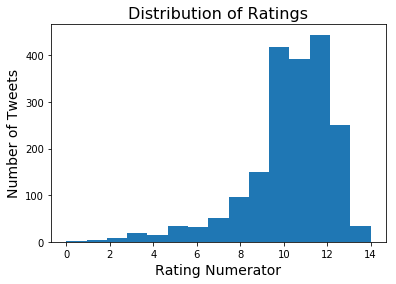

In [95]:
df_analysis['rating_numerator'].plot(kind='hist', bins=15)

plt.ylabel('Number of Tweets', fontsize = 14) 
plt.xlabel('Rating Numerator', fontsize = 14) 
plt.title('Distribution of Ratings', fontsize = 16) 
plt.show();


- The distribution is skewed to the left - most doggies get very high ratings!

In [96]:
df_analysis.query('rating_numerator >= 10').shape[0] / df_analysis.shape[0]

0.7899332306111967

- Exactly 78.99% of the doggies get a raing of 10 or higher!

**Most Favorite and Retweeted Tweets**

In [97]:
most_retweeted = df_analysis.sort_values(by = 'retweet_count', ascending = False)[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'dog_stage', 'retweet_count', 'favorite_count', 'breed']].head(10)
most_retweeted

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed
757,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,doggo,80630,161051,Labrador_retriever
792,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13,doggo,59797,118960,Eskimo_dog
391,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,none,58757,124436,Chihuahua
302,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,puppo,45513,137257,Lakeland_terrier
58,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,none,41968,102110,English_springer
325,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,doggo,38687,90535,standard_poodle
393,806629075125202948,2016-12-07 22:38:52,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",13,none,36768,78625,cocker_spaniel
107,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,pupper,34114,119656,French_bulldog
1388,678399652199309312,2015-12-20 02:20:55,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,12,none,32527,80730,Bedlington_terrier
1445,676219687039057920,2015-12-14 01:58:31,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,10,none,31432,76564,whippet


- A quick look at the 10 most retweeted Tweets:
    - Almost all get high ratings
    - No particular stage of dog stands out
    - No particular breed stands out
- However, 4 of the top 5 are with videos instead of images

In [98]:
most_favorite = df_analysis.sort_values(by = 'favorite_count', ascending = False)[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'dog_stage', 'retweet_count', 'favorite_count', 'breed']].head(10)
most_favorite

,tweet_id,timestamp,text,rating_numerator,dog_stage,retweet_count,favorite_count,breed
757,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,doggo,80630,161051,Labrador_retriever
302,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,puppo,45513,137257,Lakeland_terrier
391,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,none,58757,124436,Chihuahua
107,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,pupper,34114,119656,French_bulldog
792,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13,doggo,59797,118960,Eskimo_dog
58,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,none,41968,102110,English_springer
325,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,doggo,38687,90535,standard_poodle
133,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,12,none,29629,88963,malamute
1388,678399652199309312,2015-12-20 02:20:55,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,12,none,32527,80730,Bedlington_terrier
92,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,13,none,25331,80524,golden_retriever


- A quick look at the 10 most favorite Tweets:
    - Almost all get high ratings
    - No particular stage of dog stands out
    - No particular breed stands out
- However, 3 of the top 5 are with videos instead of images
- 4 of 5 most retweeted and 3 of 5 most favorite Tweetes are videos

In [99]:
most_retweeted_list = list(most_retweeted.tweet_id)
most_favorite_list = list(most_favorite.tweet_id)

set(most_retweeted_list) & set(most_favorite_list)

{678399652199309312,
 739238157791694849,
 744234799360020481,
 807106840509214720,
 819004803107983360,
 822872901745569793,
 866450705531457537,
 879415818425184262}

- 8 Tweets are in both most favorite and most retweeted top 10
- There might be a correlation between most favorite and most retweeted

In [100]:
df_analysis.dog_stage.value_counts()

none       1646
pupper     200 
doggo      70  
puppo      23  
floofer    8   
Name: dog_stage, dtype: int64

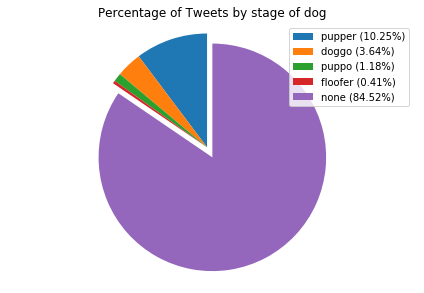

In [101]:
labels = [r'pupper (10.25%)', 
          r'doggo (3.64%)', 
          r'puppo (1.18%)', 
          r'floofer (0.41%)', 
          r'none (84.52%)']
sizes = [200, 71, 23, 8, 1649]
explode = (0, 0, 0, 0, 0.1)


patches, texts = plt.pie(sizes, explode=explode, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Tweets by stage of dog')
plt.show();

- 85.52% of the Tweets in the cleaned dataset are without a specified dog stage
- 'pupper' accounts for 10.25% of all Tweets, highest among other dog stages

In [102]:
breed_count = df_analysis[df_analysis.breed != 'none'].breed.value_counts()
breed_count.head(10)

golden_retriever      154
Labrador_retriever    101
Pembroke              94 
Chihuahua             90 
pug                   62 
toy_poodle            49 
chow                  47 
Samoyed               41 
Pomeranian            40 
malamute              33 
Name: breed, dtype: int64

- Golden retriever has the most 'coverage' on WeRateDogs

In [103]:
breed_count.sum()

1645

In [104]:
breed_count.sum() / df_analysis.shape[0]

0.844889573703133

- 84.48% of the Tweets in the cleaned dataset has a specified breed

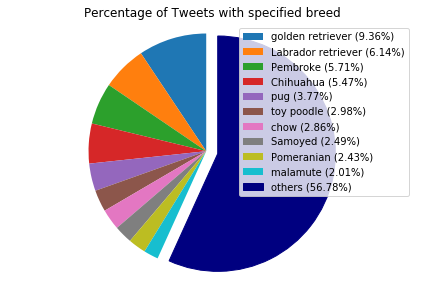

In [105]:
labels = [r'golden retriever (9.36%)', 
          r'Labrador retriever (6.14%)', 
          r'Pembroke (5.71%)', 
          r'Chihuahua (5.47%)', 
          r'pug (3.77%)', 
          r'toy poodle (2.98%)', 
          r'chow (2.86%)', 
          r'Samoyed (2.49%)', 
          r'Pomeranian (2.43%)', 
          r'malamute (2.01%)', 
          r'others (56.78%)']

sizes = [154, 101, 94, 90, 62, 49, 47, 41, 40, 33, 934]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)


patches, texts = plt.pie(sizes, explode=explode, startangle=90)
patches[10].set_color('navy')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Tweets with specified breed')
plt.show();

- Percentage of each breed among all Tweets with a speficied breed
- Golden retriever accounts for 9.36% of the "coverage"

In [106]:
fav_breed = df_analysis[df_analysis.breed != 'none']
fav_breed = fav_breed.groupby(['breed'])
fav_breed = fav_breed.favorite_count.sum()
fav_breed = fav_breed.sort_values(ascending=False)
fav_breed10 = fav_breed.head(10)
fav_breed10

breed
golden_retriever      1847119
Labrador_retriever    1142849
Pembroke              996390 
Chihuahua             738930 
French_bulldog        577619 
Samoyed               531511 
chow                  427479 
cocker_spaniel        390180 
pug                   360261 
malamute              336805 
Name: favorite_count, dtype: int64

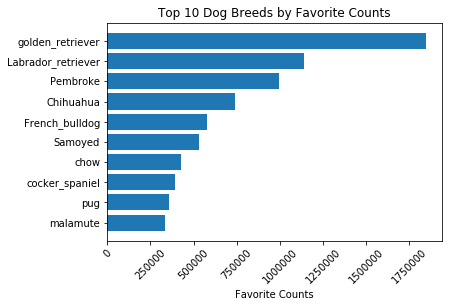

In [107]:
fig, ax = plt.subplots()
y = np.arange(len(fav_breed10.index))
ax.barh(y, fav_breed10)
ax.set_yticks(y)
ax.set_yticklabels(fav_breed10.index)
ax.invert_yaxis()
plt.xlabel('Favorite Counts') 
plt.title('Top 10 Dog Breeds by Favorite Counts')
plt.xticks(rotation=45);

- Golden retriever also gets the most favorites, followed by labrador retriever and Pembroke
- There seems to be a high similarity between the top 10 breeds most tweeted and most favorite

In [108]:
breed_count10 = breed_count.head(10)

set(list(fav_breed10.index)).intersection(list(breed_count10.index))

{'Chihuahua',
 'Labrador_retriever',
 'Pembroke',
 'Samoyed',
 'chow',
 'golden_retriever',
 'malamute',
 'pug'}

- Eight breeds are in both top 10 most tweeted and most favorites
- French bulldog and cocker spaniel are in top 10 favorites, but not in the most tweeted

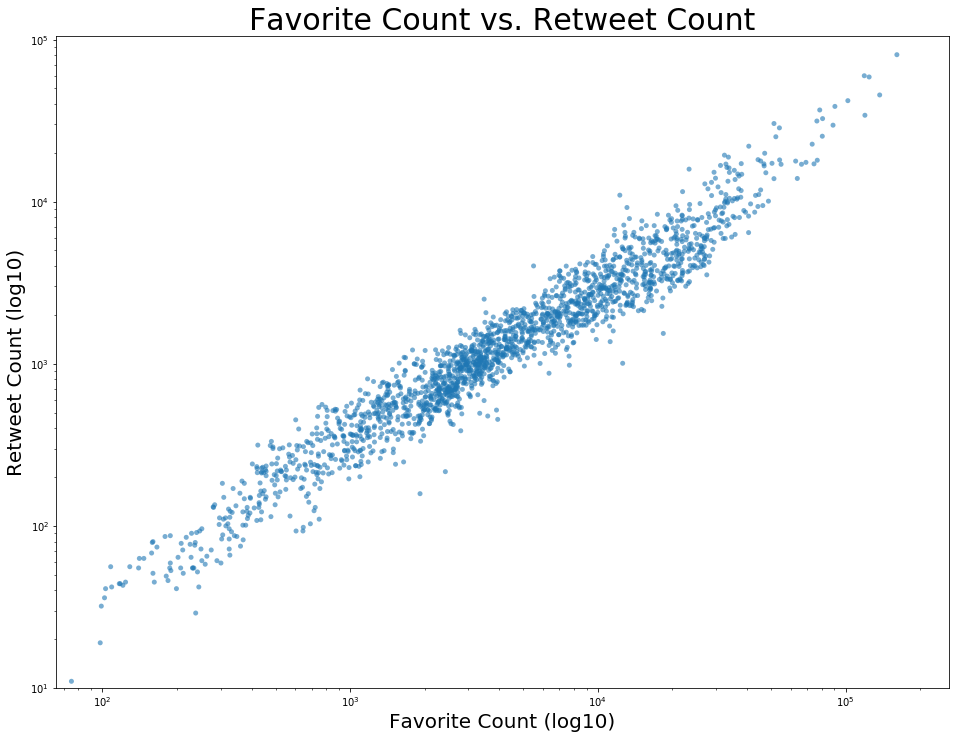

In [109]:
df = df_analysis.copy()

plt.figure(figsize = (16, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            s = markers, edgecolor = 'None', alpha = 0.6)

plt.title('Favorite Count vs. Retweet Count', fontsize=30)
plt.xlabel('Favorite Count (log10)', fontsize=20)
plt.ylabel('Retweet Count (log10)', fontsize=20)

plt.show();

- Favorite count and retweet count are positively correlated